In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.13.0'

In [3]:
# importing all required dataset which will be used for the model building

import numpy as np
import pandas as pd
import pickle
import cv2
import PIL
import pathlib
import os
from os import listdir
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report, accuracy_score
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
import random
import keras
import warnings

warnings.filterwarnings("ignore")

In [4]:
# specifyng and calling the images from there specific path

test_data_path = "Testing"
validation_path = "Validation"
path_to_directory = "All_data.zip"

In [5]:
# the ImageDataGenerator goes through this image path and brings out all images it can find

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   fill_mode='nearest')  # these module reshapes the train data into different shapes making it convenient for the the machine to learn from different angle
training_set = train_datagen.flow_from_directory(path_to_directory,
                                                 target_size=(224, 224),
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=False) # this reshapes the entire dataset to a particular shape

"""
   same thing applies to the test and validation dataset
"""

test_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   fill_mode='nearest')
test_set = test_datagen.flow_from_directory(test_data_path,
                                                 target_size=(224, 224),
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=False)




validatio_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   fill_mode='nearest')
validation_set = validatio_datagen.flow_from_directory(validation_path,
                                                 target_size=(224, 224),
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=False)

Found 31285 images belonging to 29 classes.
Found 405 images belonging to 3 classes.
Found 416 images belonging to 3 classes.


In [6]:
training_set.samples

31285

In [7]:
type(training_set)

keras.src.preprocessing.image.DirectoryIterator

In [8]:
""" the trainin_set contains both the labels and
    the images which was partitioned and arranged by
    the ImageDataGenerator and the flow_from_directory functions
"""
len(training_set[2])

2

In [6]:
# the training_set is then divided to the main data(images in array) and it labels

x_train, y_train = training_set.next()

In [88]:
y_train[30].round(9)

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

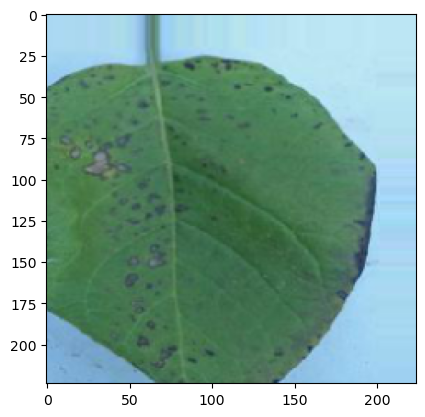

In [89]:
plt.imshow(x_train[1]) # the plt.imshow module displays the images in it original form from the array produced by the flow_from_directory

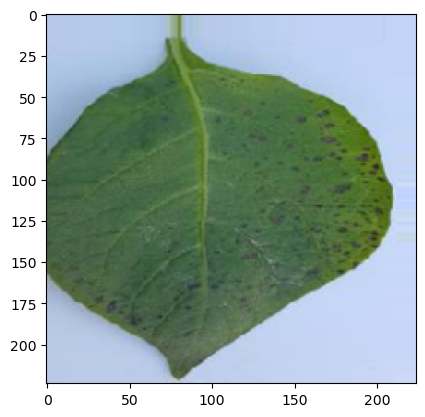

In [12]:
plt.imshow(x_train[1])

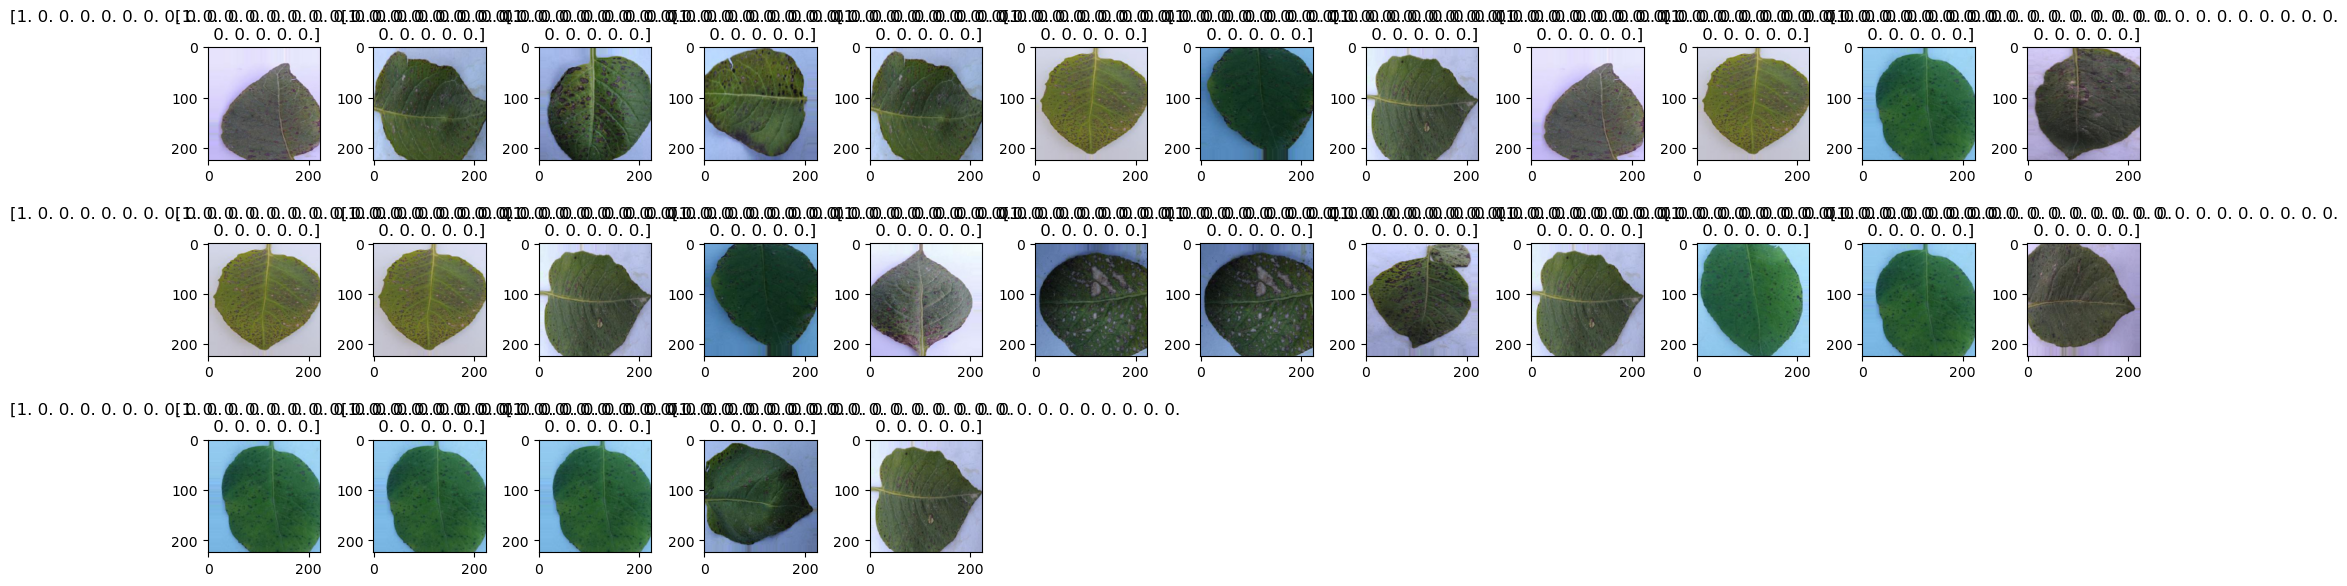

In [13]:
# a simple for statement to create different images

plt.figure(figsize = (20, 10), dpi = 100) # creating different images of the plant leaves and specifyng their pixels and size
for i in range(1, 30):
  plt.subplot(5, 12, i)
  img = random.randint(i, 30) # iltrating over 100 images to display 60
  plt.imshow(x_train[img])
  plt.title(y_train[img])
  plt.tight_layout()
  
plt.show()

In [7]:
target_names=training_set.class_indices
print(target_names);print()
print('len(target_names',len(target_names))

{'Early_Blight': 0, 'Late_Blight': 1, 'angular_leaf_spot': 2, 'bean_rust': 3, 'black_rot': 4, 'cedar_apple_rust': 5, 'healthy': 6, 'pepper_bacterial spot': 7, 'pepper_healthy': 8, 'potato_early blight': 9, 'potato_healthy': 10, 'potato_late blight': 11, 'rice_ BrownSpot': 12, 'rice_Healthy': 13, 'rice_Hispa': 14, 'rice_LeafBlast': 15, 'squash_powdery mildew': 16, 'strawberry_healthy': 17, 'strawberry_leaf scorch': 18, 'tomato mosaic virus': 19, 'tomato yellow leaf curl virus': 20, 'tomato_bacterial spot': 21, 'tomato_early blight': 22, 'tomato_healthy': 23, 'tomato_late blight': 24, 'tomato_leaf mold': 25, 'tomato_septoria leaf spot': 26, 'tomato_spider mites two-spotted spider mite': 27, 'tomato_target spot.jpg': 28}

len(target_names 29


In [8]:
labels_inv = dict((y,x) for x,y in training_set.class_indices.items())
labels_inv

{0: 'Early_Blight',
 1: 'Late_Blight',
 2: 'angular_leaf_spot',
 3: 'bean_rust',
 4: 'black_rot',
 5: 'cedar_apple_rust',
 6: 'healthy',
 7: 'pepper_bacterial spot',
 8: 'pepper_healthy',
 9: 'potato_early blight',
 10: 'potato_healthy',
 11: 'potato_late blight',
 12: 'rice_ BrownSpot',
 13: 'rice_Healthy',
 14: 'rice_Hispa',
 15: 'rice_LeafBlast',
 16: 'squash_powdery mildew',
 17: 'strawberry_healthy',
 18: 'strawberry_leaf scorch',
 19: 'tomato mosaic virus',
 20: 'tomato yellow leaf curl virus',
 21: 'tomato_bacterial spot',
 22: 'tomato_early blight',
 23: 'tomato_healthy',
 24: 'tomato_late blight',
 25: 'tomato_leaf mold',
 26: 'tomato_septoria leaf spot',
 27: 'tomato_spider mites two-spotted spider mite',
 28: 'tomato_target spot.jpg'}

In [9]:
li = list(target_names.keys())
print(li)

['Early_Blight', 'Late_Blight', 'angular_leaf_spot', 'bean_rust', 'black_rot', 'cedar_apple_rust', 'healthy', 'pepper_bacterial spot', 'pepper_healthy', 'potato_early blight', 'potato_healthy', 'potato_late blight', 'rice_ BrownSpot', 'rice_Healthy', 'rice_Hispa', 'rice_LeafBlast', 'squash_powdery mildew', 'strawberry_healthy', 'strawberry_leaf scorch', 'tomato mosaic virus', 'tomato yellow leaf curl virus', 'tomato_bacterial spot', 'tomato_early blight', 'tomato_healthy', 'tomato_late blight', 'tomato_leaf mold', 'tomato_septoria leaf spot', 'tomato_spider mites two-spotted spider mite', 'tomato_target spot.jpg']


In [14]:
type(x_train), type(y_train)

(numpy.ndarray, numpy.ndarray)

In [15]:
x_train.shape, y_train.shape

((32, 224, 224, 3), (32, 29))

In [19]:
# Load the pre-trained VGG16 model without the top (fully connected) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the convolutional layers
for layer in base_model.layers:
    layer.trainable = False

# Create a new model and add the VGG16 base
model = tf.keras.models.Sequential()
model.add(base_model)

# Add additional convolutional layers on top of VGG16
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding="same", input_shape=(224, 224, 3)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Dropout(0.25))  # Add dropout after the first convolutional layer
model.add(tf.keras.layers.Conv2D(64, (3, 3), padding="same", activation='softmax'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

# Flatten the output before adding fully connected layers
model.add(tf.keras.layers.Flatten())

# Add your custom fully connected layers
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(29, activation='softmax'))  # Adjust num_classes based on your problem

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 conv2d (Conv2D)             (None, 7, 7, 32)          147488    
                                                                 
 max_pooling2d (MaxPooling2  (None, 3, 3, 32)          0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 3, 3, 32)          0         
                                                                 
 conv2d_1 (Conv2D)           (None, 3, 3, 64)          18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 1, 1, 64)          0         
 g2D)                                                   

In [20]:
# Compile the model
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
history = model.fit(training_set, epochs = 10)

Epoch 1/10
978/978 [==============================] - 87990s 90s/step - loss: 3.0554 - accuracy: 0.1415
Epoch 2/10
978/978 [==============================] - 22408s 23s/step - loss: 2.2932 - accuracy: 0.3091
Epoch 3/10
978/978 [==============================] - 19074s 20s/step - loss: 1.7833 - accuracy: 0.4330
Epoch 4/10
978/978 [==============================] - 19026s 19s/step - loss: 1.4723 - accuracy: 0.4998
Epoch 5/10
978/978 [==============================] - 19087s 20s/step - loss: 1.2995 - accuracy: 0.5553
Epoch 6/10
978/978 [==============================] - 23796s 24s/step - loss: 1.1779 - accuracy: 0.5881
Epoch 7/10
978/978 [==============================] - 19117s 20s/step - loss: 1.1014 - accuracy: 0.6081
Epoch 8/10
978/978 [==============================] - 19224s 20s/step - loss: 1.0308 - accuracy: 0.6279
Epoch 9/10
978/978 [==============================] - 19118s 20s/step - loss: 0.9713 - accuracy: 0.6543
Epoch 10/10
978/978 [==============================] - 19093s 20

In [22]:
from tensorflow.keras.models import load_model
model.save('VGG16_PlantModel')

INFO:tensorflow:Assets written to: VGG16_PlantModel\assets


INFO:tensorflow:Assets written to: VGG16_PlantModel\assets


In [23]:
def diagram(epochs, hist):
  plt.plot(epochs, hist.history["accuracy"], label = "accuracy")
  # plt.plot(epochs, hist.history["val_accuracy"], label = "val_accuracy")
  plt.legend(shadow = True, loc = "lower right")
  plt.show()
  plt.plot(epochs, hist.history["loss"], label = "loss")
  # plt.plot(epochs, hist.history["val_loss"], label = "val_loss")
  plt.legend(shadow = True, loc = "upper right")
  plt.show()

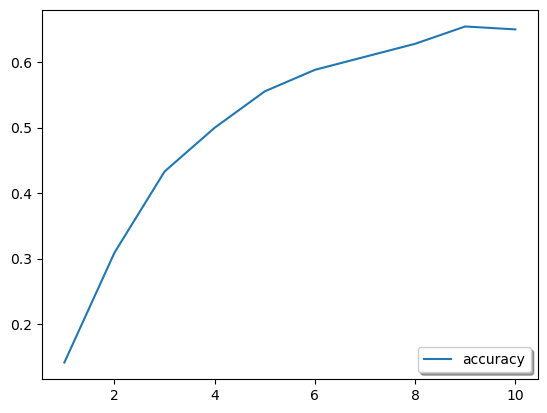

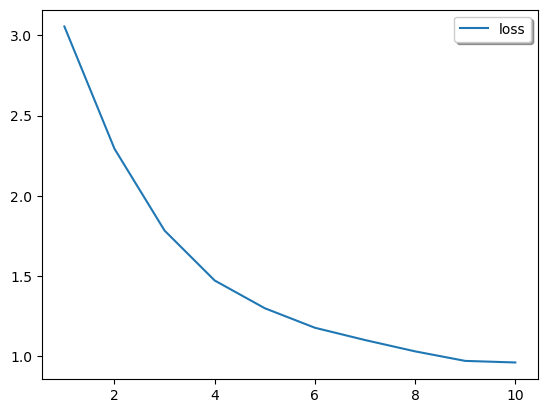

In [24]:
diagram(range(1, 11), history)

In [10]:
x_test, y_test = test_set.next()
x_validate, y_validate = validation_set.next()

# THIS IS THE CODE TO CALL THE ZIP MODEL

In [11]:
# import zipfile

# with zipfile.ZipFile('model.plant-20231213T104808Z-001.zip', 'r') as zip_ref:
#     zip_ref.extractall('extracted_model')
    
    
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model('VGG16_PlantModel')


In [12]:
y_test_pred = loaded_model.predict(x_test)

1/1 [==============================] - 15s 15s/step


In [13]:
y_train_pred = loaded_model.predict(x_train)

1/1 [==============================] - 14s 14s/step


# THIS CODE DOES THE PREDICTION OF ONE IMAGE AT A TIME

In [14]:
# Load a single image as a numpy array, and normalize pixel values
image_path = "bean_rust_train.0.jpg"
img = keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create a batch
img_array /= 255.  # Normalize to [0,1] range
print("COMPILING PREDICTION")

# # # Use the model to make a prediction
predictions = loaded_model.predict(img_array)

# The predictions are an array of probabilities for each class. 
# To get the predicted class, we take the index with the highest probability.
predicted_class = np.argmax(predictions[0])

# We can then use this index to get the corresponding class name
predicted_class_name = labels_inv[predicted_class]

print("PREDICTION COMPILED")
print(f'The model predicts that the image is of : {predicted_class_name} class')

COMPILING PREDICTION
1/1 [==============================] - 1s 1s/step
PREDICTION COMPILED
The model predicts that the image is of : bean_rust class


# MODEL EVALUATION AND PERFORMANCE MATRICS

In [15]:
def prediction(data):
    predicted_class = np.argmax(data, axis = 1)
    
    return list(predicted_class)
    


In [16]:
y_train_pred = prediction(y_train_pred)
y_train_true = prediction(y_train)
y_test_pred = prediction(y_test_pred)
y_test_true = prediction(y_test)

# ACCURACY OF THE MODEL IN RALATION TO THE TEST DATA


In [17]:
acc_score = accuracy_score(y_train_true, y_train_pred)
print(f"the accuracy of the model is :{acc_score * 100} %")

the accuracy of the model is :93.75 %


In [18]:
acc_score_test = accuracy_score(y_test_true, y_test_pred)
print(f"the accuracy of the model is :{acc_score_test * 100} %")

the accuracy of the model is :90.625 %


## the model has an accuracy of over 90 % for the original model

## while for the test data it produced over 95 % accuracy

In [127]:
pre_score = precision_score(y_train_true, y_train_pred, average = "weighted")
pre_score_test = precision_score(y_test_true, y_test_pred, average = "weighted")

print("PRECISION SCORE")
print("")
print(f"for the training data the Precision score is: {pre_score}")
print("")
print(f"for the testing data the Precision score is: {pre_score_test}")

PRECISION SCORE

for the training data the Precision score is: 1.0

for the testing data the Precision score is: 1.0


In [134]:
recall_sco = recall_score(y_train_true, y_train_pred, average = "weighted")
recall_sco_test = recall_score(y_test_true, y_test_pred, average = "weighted")

print("RECALL SCORE")
print("")
print(f"for the training data the Recall score is: {recall_sco}")
print("")
print(f"for the testing data the Recall score is: {recall_sco_test}")

RECALL SCORE

for the training data the Recall score is: 0.9375

for the testing data the Recall score is: 0.96875


In [135]:
f1_sco = f1_score(y_train_true, y_train_pred, average = "weighted")
f1_sco_test = f1_score(y_test_true, y_test_pred, average = "weighted")

print("F1 SCORE")
print("")
print(f"for the training data the F1 score is: {f1_sco}")
print("")
print(f"for the testing data the F1 score is: {f1_sco_test}")

F1 SCORE

for the training data the F1 score is: 0.967741935483871

for the testing data the F1 score is: 0.9841269841269841


In [133]:
class_report = classification_report(y_train_true, y_train_pred)
class_report_test = classification_report(y_test_true, y_test_pred)

print("CLASSIFICATION REPORT")
print("")
print(f"for the training data the Classification report is:")
print("")
print(class_report)
print("")
print(f"for the testing data the Classification report is:")
print("")
print(class_report_test)

CLASSIFICATION REPORT

for the training data the Classification report is:

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        32
           1       0.00      0.00      0.00         0

    accuracy                           0.94        32
   macro avg       0.50      0.47      0.48        32
weighted avg       1.00      0.94      0.97        32


for the testing data the Classification report is:

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        32
           1       0.00      0.00      0.00         0

    accuracy                           0.97        32
   macro avg       0.50      0.48      0.49        32
weighted avg       1.00      0.97      0.98        32



In [47]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report

# y_true: true labels of the test data
# y_pred: predicted labels of the test data
# classes: list of class names
def evaluate_classification_model(y_true, y_pred, classes):
    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    print("Confusion matrix:")
    print(cm)
    print("-----------------")
    print("-----------------")

    # Precision
    precision = precision_score(y_true, y_pred, average=None)
    print("Precision:")
    for i in range(len(classes)):
        print(f"{classes[i]}: {precision[i]:.2f}")
    print("-----------------")
    print("-----------------")

    # Recall
    recall = recall_score(y_true, y_pred, average=None)
    print("Recall:")
    for i in range(len(classes)):
        print(f"{classes[i]}: {recall[i]:.2f}")
    print("-----------------")
    print("-----------------")

    # F1 score
    f1 = f1_score(y_true, y_pred, average=None)
    print("F1 score:")
    for i in range(len(classes)):
        print(f"{classes[i]}: {f1[i]:.2f}")
    print("-----------------")
    print("-----------------")

    # Classification report
    report = classification_report(y_true, y_pred, target_names=classes)
    print("Classification report:")
    print(report)

In [112]:
report = classification_report(y_train_true, y_train_pred, )
print("Classification report:")
print(report)

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        32
           1       0.00      0.00      0.00         0

    accuracy                           0.94        32
   macro avg       0.50      0.47      0.48        32
weighted avg       1.00      0.94      0.97        32



In [114]:
evaluate_classification_model(y_train_true, y_train_pred, li[0:2])

Confusion matrix:
[[30  2]
 [ 0  0]]
-----------------
-----------------
Precision:
Early_Blight: 1.00
Late_Blight: 0.00
-----------------
-----------------
Recall:
Early_Blight: 0.94
Late_Blight: 0.00
-----------------
-----------------
F1 score:
Early_Blight: 0.97
Late_Blight: 0.00
-----------------
-----------------
Classification report:
              precision    recall  f1-score   support

Early_Blight       1.00      0.94      0.97        32
 Late_Blight       0.00      0.00      0.00         0

    accuracy                           0.94        32
   macro avg       0.50      0.47      0.48        32
weighted avg       1.00      0.94      0.97        32



# CONCLUSION

We have created a very simple Convolutional Neural Network encoperated with a VGG16 pre-trained model, we obtained an image containing 29 classes of different plant diseases, which are:

0: Early_Blight,
1: Late_Blight,
2: angular_leaf_spot,
3: bean_rust,
4: black_rot,
5: cedar_apple_rust,
6: healthy,
7: pepper_bacterial spot,
8: pepper_healthy,
9: potato_early blight,
10: potato_healthy,
11: potato_late blight,
12: rice_ BrownSpot,
13: rice_Healthy,
14: rice_Hispa,
15: rice_LeafBlast,
16: squash_powdery mildew,
17: strawberry_healthy,
18: strawberry_leaf scorch,
19: tomato mosaic virus,
20: tomato yellow leaf curl virus,
21: tomato_bacterial spot,
22: tomato_early blight,
23: tomato_healthy,
24: tomato_late blight,
25: tomato_leaf mold,
26: tomato_septoria leaf spot,
27: tomato_spider mites two-spotted spider mite,
28: tomato_target spot.jpg.

Due to the amount of data and availabe resources the model took approximately 3 days to build, which after building yielded an accuracy of over 90% in both the train and test datas.

# PERFORMANCE

Its performance was evaluated with the following matrix

Precision_score
Recall_score
F1_score

which provided the following results

## PRECISION SCORE

for the training data the Precision score is: 1.0

for the testing data the Precision score is: 1.0

## RECALL SCORE

for the training data the Recall score is: 0.9375

for the testing data the Recall score is: 0.96875

## F1 SCORE

for the training data the F1 score is: 0.967741935483871

for the testing data the F1 score is: 0.9841269841269841


### The values of each metrics shows different attributes of the model:

#### Precision_score :
Precision measures the percentage of correct positive predictions relative to total positive predictions. It tells us how many of the predicted positive cases are actually positive.

#### Recall_score:
Recall measures the percentage of correct positive predictions relative to total actual positives. It tells us how many of the actual positive cases are correctly predicted as positive.

#### F1_score:
F1 score is a weighted harmonic mean of precision and recall. It provides a balanced view of the model’s performance


At the later stage the model is stored and can easily be deployed at will.

In [19]:
conf_matrix = confusion_matrix(y_test_true, y_test_pred)

In [20]:
conf_matrix

array([[29,  3],
       [ 0,  0]], dtype=int64)